In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import scipy.stats as sp
from scipy.optimize import minimize
from scipy.special import logit

In [2]:
x, y = datasets.make_classification(
    n_samples=8, n_features=2, n_classes=2, random_state=123,
    n_informative=1, n_redundant=0, n_clusters_per_class=1
)
np.c_[y, x]

array([[ 1.        , -0.11166034,  2.20593008],
       [ 1.        ,  1.75652211, -0.43435128],
       [ 1.        ,  0.80351538,  2.18678609],
       [ 0.        , -1.0887545 ,  1.49138963],
       [ 0.        , -0.52755975, -0.638902  ],
       [ 0.        , -0.65949851, -0.67888615],
       [ 1.        ,  0.73494356, -0.44398196],
       [ 0.        , -1.31281138, -0.09470897]])

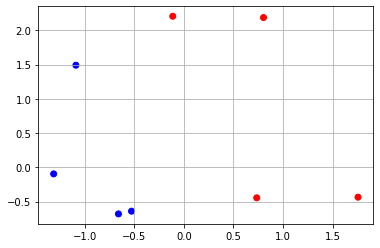

In [3]:
#Visualization
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')
plt.grid()
plt.show()


In [4]:
def logit(x):
  return 1 / ( 1 + np.exp(-x) )

In [5]:
def cross_entropy(beta):
  yhat = logit( np.dot(x, beta[1:]) + beta[0] )
  return np.mean( - y * np.log(yhat) - (1 - y) * np.log(1 - yhat)  )

In [6]:
beta = np.array([0, 0, 0])
result = minimize(cross_entropy, beta)
result.x

array([-0.80219006, 18.23175153,  6.11756816])

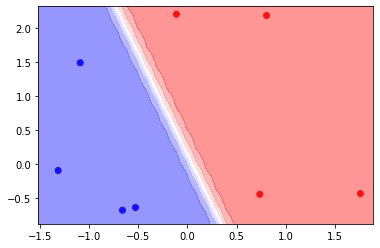

In [7]:
x1, x2 = x[:,0], x[:,1]
xy1, xy2 = np.meshgrid(
    np.arange(x1.min() - 0.2, x1.max() + 0.2, 0.1), 
    np.arange(x2.min() - 0.2 , x2.max() + 0.2 , 0.1)
)

beta = result.x
xx = np.c_[xy1.flatten(), xy2.flatten()]
yhat = logit(np.dot(xx, beta[1:]) + beta[0] )

plt.scatter(x1, x2, c = y, cmap='bwr')
plt.contourf(xy1, xy2, yhat.reshape(xy1.shape), cmap='bwr', alpha=0.48)
plt.show()

In [8]:
x, y = datasets.make_classification(
    n_samples=1000, n_features=2, n_informative=2, n_classes=2, n_redundant=0,
    n_clusters_per_class=1, random_state=1
)
np.c_[y, x]

array([[ 1.        ,  1.53682958, -1.39869399],
       [ 1.        ,  1.36917601, -0.63734411],
       [ 1.        ,  0.50231787, -0.45910529],
       ...,
       [ 1.        ,  1.82026677, -2.95716663],
       [ 0.        ,  1.00499902,  0.93628981],
       [ 0.        ,  1.46210987,  1.14497791]])

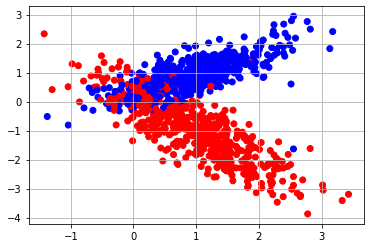

In [9]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')
plt.grid()
plt.show()

In [10]:
beta = np.array([0, 0, 0])
result = minimize(cross_entropy, beta)
result.x

array([ 1.0604636 , -1.03504223, -3.15872411])

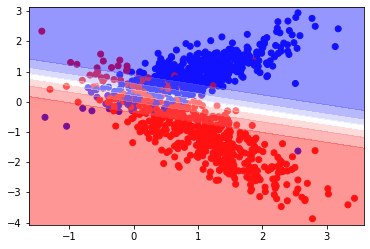

In [11]:
x1, x2 = x[:,0], x[:,1]
xy1, xy2 = np.meshgrid(
    np.arange(x1.min() - 0.2, x1.max() + 0.2, 0.1), 
    np.arange(x2.min() - 0.2 , x2.max() + 0.2 , 0.1)
)

beta = result.x
xx = np.c_[xy1.flatten(), xy2.flatten()]
yhat = logit(np.dot(xx, beta[1:]) + beta[0] )

plt.scatter(x1, x2, c = y, cmap='bwr')
plt.contourf(xy1, xy2, yhat.reshape(xy1.shape), cmap='bwr', alpha=0.48)
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
def cut_evaluate(yhat, threshold):
  yhat = yhat.copy()
  yhat[yhat > threshold] = 1
  yhat[yhat < threshold] = 0

  return yhat.astype(int)

In [13]:
beta = result.x
yhat = logit( np.dot(x, beta[1:]) + beta[0] )
yhat = cut_evaluate(yhat, 0.5)
cmat = confusion_matrix(y, yhat)
cmat

array([[450,  50],
       [ 48, 452]], dtype=int64)

In [14]:
Accuracy = (cmat[0,0] + cmat[1,1]) / np.sum(cmat)
Accuracy

0.902

In [15]:
precision = cmat[0,0] / (cmat[0,0] + cmat[0,1])
precision

0.9

In [16]:
recall = cmat[0,0] / (cmat[0,0] + cmat[1,0])
recall 

0.9036144578313253

In [17]:
F1score = 2 * ( (precision * recall)/(precision + recall)  )
F1score

0.9018036072144289

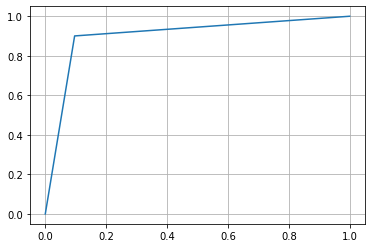

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(yhat, y)
plt.plot(fpr, tpr)
plt.grid()
plt.show()

In [19]:
roc_auc_score(y, yhat)

0.902

In [29]:
logitModel = LogisticRegression(penalty='none').fit(x, y)

In [30]:
print(logitModel.coef_)
print(logitModel.intercept_)
print(logitModel.score(x, y))

[[-1.03499955 -3.15864365]]
[1.0604751]
0.902


In [28]:
yhat = logitModel.predict(x)
confusion_matrix(y, yhat)

array([[450,  50],
       [ 48, 452]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
yhat = logitModel.predict(x)
acc = accuracy_score(y, yhat)
pre = precision_score(y, yhat)
rec = recall_score(y, yhat)
f1 = f1_score(y, yhat)
roc = roc_auc_score(y, yhat)
print(f'accuracy={acc}, precision={pre}, recall={rec}, f-1 Score={f1}, ROC_AUC_Score={roc}')

accuracy=0.902, precision=0.900398406374502, recall=0.904, f-1 Score=0.9021956087824352, ROC_AUC_Score=0.902
